## 数据爬取

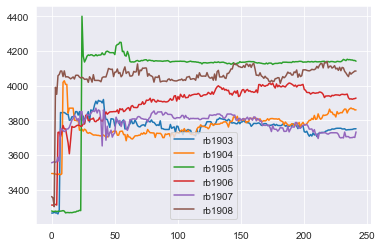

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as urllib2
import json
from statsmodels.tsa.stattools import adfuller
def findPairs():
    ids = ['rb1903', 'rb1904', 'rb1905', 'rb1906', 'rb1907', 'rb1908']
    url_5m = 'http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesMiniKLine5m?symbol='
    result = []
 
    for id in ids:
        url = url_5m + id
        req = urllib2.Request(url)
        rsp = urllib2.urlopen(req)
        res = rsp.read()
        res_json = json.loads(res)
        result.append(res_json)
 
    close_result = []
    for instrument in result:
        oneDay_list = []
        for oneDay in instrument:
            oneDay_list.append(float(oneDay[-2]))
        close_result.append(np.array(oneDay_list))
    close_result = np.array(close_result)
    close_result = close_result.T
    df = pd.DataFrame(data=close_result, columns=ids)
    df.plot()
    plt.show()
    return df
df=findPairs()



the group satisfying the condition is
rb1905 , rb1906
rb1903 , rb1907
rb1906 , rb1908


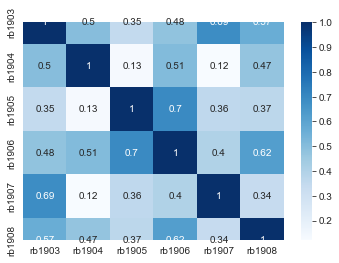

In [42]:
#筛选相关系数高于threshold的组合

def select_group_by_corr(data,threshold):
    # print(data.corr())
    corr_matrix = data.corr().values
    # print(corr_matrix)
    col_name= data.columns
    #判断是否大于阈值
    condition = corr_matrix > threshold
    satisfy = np.where(condition)
    row_indexs = satisfy[0]
    col_indexs = satisfy[1]
    target_set = set()
    #选出符合条件的组合
    for index in range(len(row_indexs)):
        if row_indexs[index] >= col_indexs[index]:
            continue
        ele1 = col_name[row_indexs[index]]
        ele2 = col_name[col_indexs[index]]
        target_set.add((ele1,ele2))
    print("the group satisfying the condition is")
    for ele in  target_set:
        print(ele[0]+' , '+ele[1])
    sns.heatmap(corr_matrix, annot=True, square=True,cmap='Blues')
    plt.xticks(np.arange(0.5,len(col_name)+0.5),col_name)
    plt.yticks(np.arange(0.5,len(col_name)+0.5),col_name)
    plt.savefig('相关系数热力图.png',dpi=300)
    plt.show()
    
    return target_set
    
group=select_group_by_corr(data=df,threshold=0.6)  

In [72]:
import csv
import statsmodels.api as sm
# def check_co_integrated(y,x):
#     x = sm.add_constant(x)
#     # 创建线性回归模型并拟合数据
#     model = sm.OLS(y, x)
#     results = model.fit()
#     # 获取残差
#     residuals = results.resid
#     beta = results.params[1]
#     const = results.params[0]
#     result = adfuller(residuals)
#     row = []
#     row.append(round(const,4))
#     row.append(round(beta,4))
#     row.append(round(result[0],4))
#     row.append(round(result[1],4))
#     for key, value in result[4].items():
#         row.append(round(value,4))
#     if result[1]>0.05:
#         row.append('不存在协整关系')
#     else:
#         row.append('存在协整关系')
#     return row
# def cointegration_test(data,groups,out_file_path_1,out_file_path_2):
#     #ADF检验每个期货的价格平稳性以及一阶差分平稳性
#     eles = set()
#     for ele in  groups:
#         eles.add(ele[0])
#         eles.add(ele[1])
#     with open(out_file_path_1,'w+',encoding='utf-8-sig',newline='') as f:
#         writer= csv.writer(f)
#         writer.writerow(['future name','ADF Statistics','p-value','Critical values(1%)','Critical values(5%)','Critical values(10%)','is sationary(5%)'])
#         for future_name in eles:
#             data_future = data[future_name]
#             result = adfuller(data_future)
#             # print(result)
#             row = [future_name]
#             row.append(round(result[0],4))
#             row.append(round(result[1],4))
#             for key, value in result[4].items():
#                 row.append(round(value,4))
#             if result[1]>0.05:
#                 row.append('N')
#             else:
#                 row.append('Y')
#             writer.writerow(row)
#             # print(row)
#             row = [future_name+'(1)']
#             data_future = data_future.diff()[1:]
#             result = adfuller(data_future)
#             row.append(round(result[0],4))
#             row.append(round(result[1],4))
#             for key, value in result[4].items():
#                 row.append(round(value,4))
#             if result[1]>0.05:
#                 row.append('N')
#             else:
#                 row.append('Y')
#             writer.writerow(row)
#     #进行协整关系检验
#     with open(out_file_path_2,'w+',encoding='utf-8-sig',newline='') as f1:
#         writer= csv.writer(f1)
#         writer.writerow(['group','coef','const','ADF Statistics','p-value','Critical values(1%)','Critical values(5%)','Critical values(10%)','is co-integrated(5%)'])
#         for group in groups:
#             row=[]
#             row.append(group)
#             row = row + check_co_integrated(data[group[0]],data[group[1]])
#             writer.writerow(row)
    
    
    

In [73]:
cointegration_test(df,group,'ADF平稳性检验.csv','协整关系检验.csv')


In [ ]:
def ADF_test(data):
    #航空公司乘客数据adf检验
    result = adfuller(data)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')
def check_co_integrated(y,x):
    x = sm.add_constant(x)

    # 创建线性回归模型并拟合数据
    model = sm.OLS(y, x)
    results = model.fit()

    # 获取残差
    residuals = results.resid

    print(residuals)
    print(results.summary())
    with open('regression_summary.txt', 'w') as file:
        file.write(results.summary().as_text())
    result = adfuller(residuals)
    print('残差 ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print(f'Result: y 与 x {"不" if result[1] > 0.05 else ""}存在协整关系')